# Installation

Run in command line or terminal:

conda install -c conda-forge tesserocr

Import original pyDactor through terminal where notebook will be run:
git clone https://github.com/hulto/pyDactor.git


NOTE: I had to make several code changes to main.py and api.py to get it to work for my machine.

My versions of main.py and api.py are in this GitHub repository.

# Setup

Depending on where conda installs tesseract, you may have to update the api.py file to
point to the 'tessdata' folder in line 164.

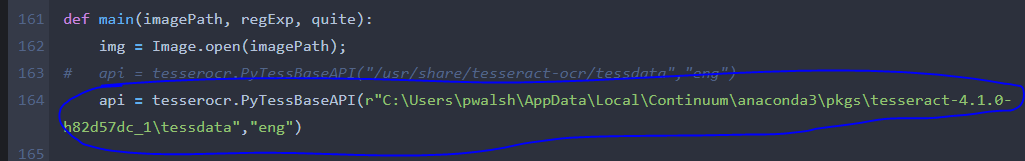

By default the code in api.py points here:

api = tesserocr.PyTessBaseAPI("/usr/share/tesseract-ocr/tessdata","eng") 

If the api variable inside api.py does not correctly point to the 'tessdata' folder you will
get this error:
"RuntimeError: Failed to init API, possibly an invalid tessdata path"


If you are unsure where the 'tessdata' folder was downloaded, try searching for it in file explorer.

# Set Path for Files
Below cell sets the paths for images that you want redacted. 
Add additional paths with .append() method.

In [1]:
path_list = []
path_list.append(r'C:\Users\pwalsh\pyDactor\docs')
print("path_list: ",path_list)

path_list:  ['C:\\Users\\pwalsh\\pyDactor\\docs']


# Redact Text on Images
Below cell redacts all images in the specified folder (see above) and moves the
redacted versions to another folder specified in 'dest' variable (line 9).

Line 15 specifies the regular expression that is used to redact text.

Right now it is set to [A-Za-z0-9] which redacts all letters and numbers 0-9.

In [3]:
import os

counter = 1
for file in path_list:
    os.chdir(file)
    print('\n',file,'\n')
    files = os.listdir()
#     print(files)
    dest = "docs_redacted"
    for img in files:
        if (img.split(".")[-1] == 'jpg'):
            img = img.split(".jpg")
            img = img[0]
#             print(file+'/'+img+'.jpg')
            redact = r'python C:\Users\pwalsh\pyDactor\main_modded.py -f '+file+'\\'+img+'.jpg'+' -e '+'[A-Za-z0-9] '+'[-q]'
            !{redact}
#             print(redact)
    
            move = 'move '+file+'\\'+img+'_redact.jpg '+'C:\\Users\\pwalsh\\pyDactor\\'+dest+'\\'+img+'_redact.jpg'
            !{move}  
#             print(move)
            print(counter,' ',img+'.jpg')
            counter += 1


 C:\Users\pwalsh\pyDactor\docs 

        1 file(s) moved.
1   3270_1.jpg


# Run individual Redact Call

In [ ]:
!python main.py -f "C:\Users\pwalsh\pyDactor\3270_1.jpg" -e "[A-Za-z0-9]" [-q]